In [40]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from glob import glob

In [41]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'valid'

In [42]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [43]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [44]:
# Folders in the Training Set
folders = glob('dataset/*')
folders

['dataset\\Asthma Plant',
 'dataset\\Avaram',
 'dataset\\Coatbuttons',
 'dataset\\Heart-Leaved Moonseed',
 'dataset\\Indian Jujube',
 'dataset\\Malabar Catmint',
 'dataset\\Mexican Mint',
 'dataset\\Panicled Foldwing',
 'dataset\\Prickly Chaff Flower',
 'dataset\\Punarnava',
 'dataset\\Rosary Pea',
 'dataset\\Sweet Flag',
 'dataset\\Tinnevelly Senna',
 'dataset\\Trellis Vine',
 'dataset\\Velvet Bean']

In [45]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [46]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [47]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [49]:
training_set = train_datagen.flow_from_directory('dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1156 images belonging to 15 classes.


In [50]:
test_set = test_datagen.flow_from_directory('dataset',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1156 images belonging to 15 classes.


In [51]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\subra\AppData\Local\Temp\ipykernel_27440\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
37/37 [==============================] - 92s 2s/step - loss: 4.9239 - accuracy: 0.6081 - val_loss: 0.5931 - val_accuracy: 0.8953
Epoch 2/10
37/37 [==============================] - 88s 2s/step - loss: 0.5137 - accuracy: 0.9118 - val_loss: 0.3677 - val_accuracy: 0.9118
Epoch 3/10
37/37 [==============================] - 87s 2s/step - loss: 0.5877 - accuracy: 0.9178 - val_loss: 0.1880 - val_accuracy: 0.9602
Epoch 4/10
37/37 [==============================] - 88s 2s/step - loss: 0.3828 - accuracy: 0.9317 - val_loss: 0.1233 - val_accuracy: 0.9775
Epoch 5/10
37/37 [==============================] - 88s 2s/step - loss: 0.3351 - accuracy: 0.9438 - val_loss: 0.0748 - val_accuracy: 0.9810
Epoch 6/10
37/37 [==============================] - 87s 2s/step - loss: 0.1718 - accuracy: 0.9671 - val_loss: 0.0702 - val_accuracy: 0.9853
Epoch 7/10
37/37 [==============================] - 88s 2s/step - loss: 0.1632 - accuracy: 0.9715 - val_loss: 0.0897 - val_accuracy: 0.9818
Epoch 8/10
37/37 [==

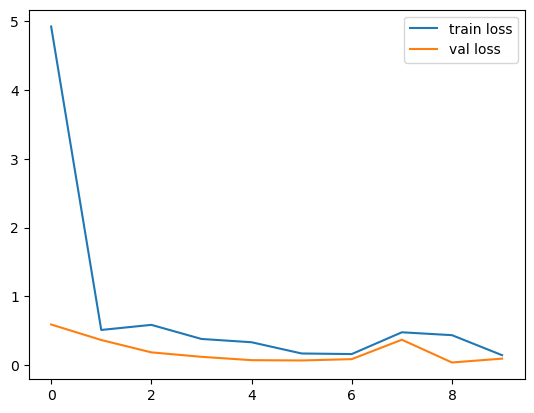

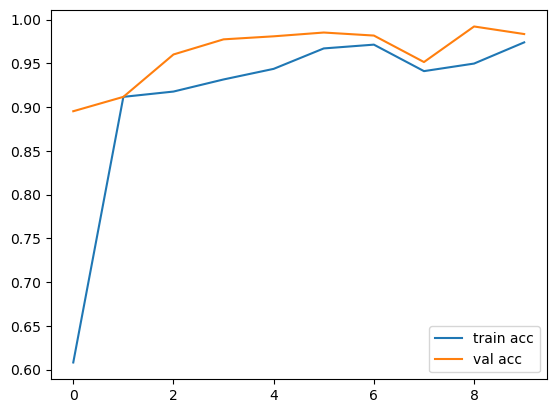

<Figure size 640x480 with 0 Axes>

In [52]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [53]:
# model.save('model.h5')

In [54]:
y_pred = model.predict(test_set)
print(y_pred)

y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
y_test = test_set.classes
print(y_test)

37/37 [==============================] - 41s 1s/step
[[1.5063125e-29 4.7903565e-37 2.2273437e-34 ... 2.9702743e-21
  1.0086749e-28 5.2213822e-10]
 [1.9891622e-18 1.1378939e-29 3.4206272e-07 ... 1.2487632e-16
  1.5209923e-05 1.4228453e-06]
 [1.9973245e-34 1.0000000e+00 6.9908041e-37 ... 6.8020091e-36
  3.0492631e-35 7.2490546e-34]
 ...
 [1.2220739e-34 0.0000000e+00 2.4093848e-18 ... 3.0116819e-22
  4.2799407e-22 4.7528027e-11]
 [5.6960608e-26 0.0000000e+00 1.7626681e-17 ... 3.4092367e-33
  1.0000000e+00 8.4929128e-31]
 [2.2637632e-29 0.0000000e+00 9.1173407e-23 ... 9.2289022e-29
  6.8527794e-33 1.3170286e-17]]
[11  4  1 ...  4 13  5]
[ 0  0  0 ... 14 14 14]


In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 4  4  3  2  7  5  4 12  6  6  6 11  3  3  5]
 [ 2  5  2  4  2  3  3  4  3  6  6  3  3  4 16]
 [10  2  3  5  8  3  1  5  3  4  3  3  6  0 10]
 [ 1  3  4  3  7  3  2  5  5  2  5  6  0  8 11]
 [10 11  3  3 10  7  3  8  5  7  4  4  6  3 21]
 [ 2  4  6  4  8  4  3  1  6  4  1  1  4  8 12]
 [11  1  4  1  3  6  1  3  5  2  3  3  3  0  8]
 [ 9  2  6  3  7  6  5  6  2  2  3  2  5  4 14]
 [ 3  4  5  2  8  3  3  6  4  5  1  1  5  4 12]
 [ 4  5  5  3  6  3  5  7  6  3  4  1  6  1 16]
 [ 6  2  1  1  4  3  3  2  3  7  4  2  3  4  8]
 [ 2  4  3  1  1  6  5  3  1  2  3  3  5  4 14]
 [ 4  0  9 11  8  3  4  5  6  5  4  5  4  0  4]
 [ 4  5  2  3  7  2  1  3  0  3  3  4  7  5 11]
 [11  8  9 14 19 10 12 15 11 14  9  8 10 12 30]]
              precision    recall  f1-score   support

           0       0.05      0.05      0.05        81
           1       0.08      0.08      0.08        66
           2       0.05      0.05      0.05        66
           3       0.05      0.05      0.05        65
        